In [4]:
import pandas as pd
import json
from pandas import json_normalize
import numpy as np

In [5]:
with open('/content/drive/MyDrive/OCR/printed_data_info.json', "r", encoding="utf8") as f:
    contents = f.read() # string 타입
    json_data = json.loads(contents)

json_strc = json_data['annotations']

In [6]:
df = json_normalize(json_strc) 

In [7]:
data = df[['image_id', 'text']]
data = data.rename(columns={'text':'label'})
data.head()

,image_id,label
0,00000000,궶
1,00000001,뵞
2,00000002,푚
3,00000003,섆
4,00000004,읂


In [8]:
data['img_name']= data['image_id'] + '.png'

In [9]:
data.head(7)

,image_id,label,img_name
0,00000000,궶,00000000.png
1,00000001,뵞,00000001.png
2,00000002,푚,00000002.png
3,00000003,섆,00000003.png
4,00000004,읂,00000004.png
5,00000005,좠,00000005.png
6,00000006,떢,00000006.png


In [10]:
data['image_id'] = data['image_id'].astype('str')
data['img_name'] = data['img_name'].astype('str')

In [11]:
len(data)

878100

In [12]:
import os

filelist = os.listdir('/content/drive/MyDrive/OCR/sentence')


my_array = np.array(filelist) 
condition = data['img_name'].isin(my_array)
target = data[condition]

In [13]:
target

,image_id,label,img_name
835750,03343000,혐의로 기소중지된 상태이기 때문에한국에 입국했다면 통보조치가,03343000.png
835751,03343001,대는 대학본부 학생상벌위원회가 관련 절차에 따라 재심사를 하고 있,03343001.png
835755,03343005,고 했다.,03343005.png
835762,03343012,했던 치즈축제와 오수의견제를 통합해 올해 처음 통합축제로 연다.,03343012.png
835767,03343017,"고했다. 재판부는 판결문에서 ""어린 딸에게 죽음을 강요한 것은 어떤",03343017.png
...,...,...,...
842684,03349934,"거나 성추행을 한 경우에 내려지는 형벌 수준""이라며 ""인터넷에 글을",03349934.png
842688,03349938,단축에 따른 중소기업의 부담을 덜어주기 위해지원사업을 펴고 있으,03349938.png
842689,03349939,"종합 서비스센터 설립은 필수적인 과제였다""면서 ""원전 주기기 제작",03349939.png
842700,03349950,한국노총도 법안 강행시 벌이기로 했던 노사정위 탈퇴와 대정부 투쟁,03349950.png


In [15]:
target.to_csv('/content/drive/MyDrive/OCR/img_label_pair.csv')

In [2]:
import pandas as pd

In [38]:
target = pd.read_csv('/content/drive/MyDrive/OCR/img_label_pair.csv', index_col=0)

In [39]:
target

,image_id,label,img_name
835750,3343000,혐의로 기소중지된 상태이기 때문에한국에 입국했다면 통보조치가,03343000.png
835751,3343001,대는 대학본부 학생상벌위원회가 관련 절차에 따라 재심사를 하고 있,03343001.png
835755,3343005,고 했다.,03343005.png
835762,3343012,했던 치즈축제와 오수의견제를 통합해 올해 처음 통합축제로 연다.,03343012.png
835767,3343017,"고했다. 재판부는 판결문에서 ""어린 딸에게 죽음을 강요한 것은 어떤",03343017.png
...,...,...,...
842684,3349934,"거나 성추행을 한 경우에 내려지는 형벌 수준""이라며 ""인터넷에 글을",03349934.png
842688,3349938,단축에 따른 중소기업의 부담을 덜어주기 위해지원사업을 펴고 있으,03349938.png
842689,3349939,"종합 서비스센터 설립은 필수적인 과제였다""면서 ""원전 주기기 제작",03349939.png
842700,3349950,한국노총도 법안 강행시 벌이기로 했던 노사정위 탈퇴와 대정부 투쟁,03349950.png


In [42]:
# !git clone https://github.com/daekeun-ml/sm-kornlp-usecases.git 

Cloning into 'sm-kornlp-usecases'...
remote: Enumerating objects: 321, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 321 (delta 1), reused 0 (delta 0), pack-reused 317
Receiving objects: 100% (321/321), 235.34 MiB | 13.53 MiB/s, done.
Resolving deltas: 100% (56/56), done.
Updating files: 100% (232/232), done.


In [17]:
%cd sm-kornlp-usecases/trocr

/content/sm-kornlp-usecases/trocr


In [18]:
!pip install -r requirements.txt
!pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/sm-kornlp-usecases/trocr
ERROR: file:///content/sm-kornlp-usecases/trocr does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [19]:
FULL_TRAINING = False # using pre-trained model, vice versa 
import random
import os
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from pynvml import *
import torch
from torch.utils.data import Dataset
from PIL import Image
from transformers import VisionEncoderDecoderModel, AutoTokenizer

def print_gpu_utilization():
    nvmlInit()
    handle = nvmlDeviceGetHandleByIndex(0)
    info = nvmlDeviceGetMemoryInfo(handle)
    print(f"GPU memory occupied: {info.used//1024**2} MB.")


def print_summary(result):
    print(f"Time: {result.metrics['train_runtime']:.2f}")
    print(f"Samples/second: {result.metrics['train_samples_per_second']:.2f}")
    print_gpu_utilization()

In [20]:
if FULL_TRAINING:
    vision_hf_model = 'facebook/deit-base-distilled-patch16-384'
    nlp_hf_model = "klue/roberta-base"
    
    # Reference: https://github.com/huggingface/transformers/issues/15823
    # initialize the encoder from a pretrained ViT and the decoder from a pretrained BERT model. 
    # Note that the cross-attention layers will be randomly initialized, and need to be fine-tuned on a downstream dataset
    model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(vision_hf_model, nlp_hf_model)
    tokenizer = AutoTokenizer.from_pretrained(nlp_hf_model)
else:
    trocr_model = 'daekeun-ml/ko-trocr-base-nsmc-news-chatbot'
    model = VisionEncoderDecoderModel.from_pretrained(trocr_model)
    tokenizer = AutoTokenizer.from_pretrained(trocr_model)    

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [22]:
CFG = {
    'IMG_HEIGHT_SIZE':64,
    'IMG_WIDTH_SIZE':224,
    'EPOCHS':5,
    'LEARNING_RATE':1e-3,
    'BATCH_SIZE':256,
    'NUM_WORKERS':4, # 본인의 GPU, CPU 환경에 맞게 설정
    'SEED':41
}

In [23]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(CFG['SEED']) # Seed 고정

In [40]:
#/content/drive/MyDrive/OCR/sentence
target['img_path']= '/content/drive/MyDrive/OCR/sentence/'+data['img_name']

In [42]:
target.drop(['image_id', 'img_name'],axis=1,inplace=True)
target.img_path=target.img_path.apply(lambda x: x.lstrip('./'))

In [43]:
target['len'] = target['label'].str.len()
train_v1 = target[target['len']==1]

In [44]:
target = target[target['len']>1]
train_v2, val, _, _ = train_test_split(target, target['len'], test_size=0.4, random_state=CFG['SEED'])

In [45]:
train_df=train_v2.drop('len',axis=1)
test_df=val.drop('len',axis=1)

In [46]:
train_df.head(3)

,label,img_path
838795,불만과 불쾌감을 공개적으로 언급해 남북관계를 더욱 경색시키고 있,content/drive/MyDrive/OCR/sentence/03346045.png
836348,대 의예과 1516학번 남학생 11명은 지난해 35월 학교 인근 고깃집,content/drive/MyDrive/OCR/sentence/03343598.png
837061,시 김종창 금감원장에게 청탁한 정황을 포착한 것으로 30일 확인됐,content/drive/MyDrive/OCR/sentence/03344311.png


In [47]:
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [48]:
class OCRDataset(Dataset):
    def __init__(self, dataset_dir, df, processor, tokenizer, max_target_length=32):
        self.dataset_dir = dataset_dir
        self.df = df
        self.processor = processor
        self.max_target_length = max_target_length
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # get file name + text 
        file_name = self.df['img_path'][idx]
        text = self.df['label'][idx]
        # prepare image (i.e. resize + normalize)
        image = Image.open(self.dataset_dir + file_name).convert("RGB")
        pixel_values = self.processor(image, return_tensors="pt").pixel_values
        # add labels (input_ids) by encoding the text      
        labels = self.tokenizer(text, padding="max_length", 
                                stride=32,
                                truncation=True,
                                max_length=self.max_target_length).input_ids
        
        # important: make sure that PAD tokens are ignored by the loss function
        labels = [label if label != self.tokenizer.pad_token_id else -100 for label in labels]

        encoding = {"pixel_values": pixel_values.squeeze(), "labels": torch.tensor(labels)}
        return encoding

In [49]:
from transformers import TrOCRProcessor
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
dataset_dir = '/'
max_length = 32

train_dataset = OCRDataset(
    dataset_dir=dataset_dir,
    df=train_df,
    tokenizer=tokenizer,
    processor=processor,
    max_target_length=max_length
)
eval_dataset = OCRDataset(
    dataset_dir=dataset_dir,
    df=test_df,
    tokenizer=tokenizer,
    processor=processor,
    max_target_length=max_length
)

print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(eval_dataset))

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Number of training examples: 845
Number of validation examples: 564


pixel_values torch.Size([3, 384, 384])
labels torch.Size([32])


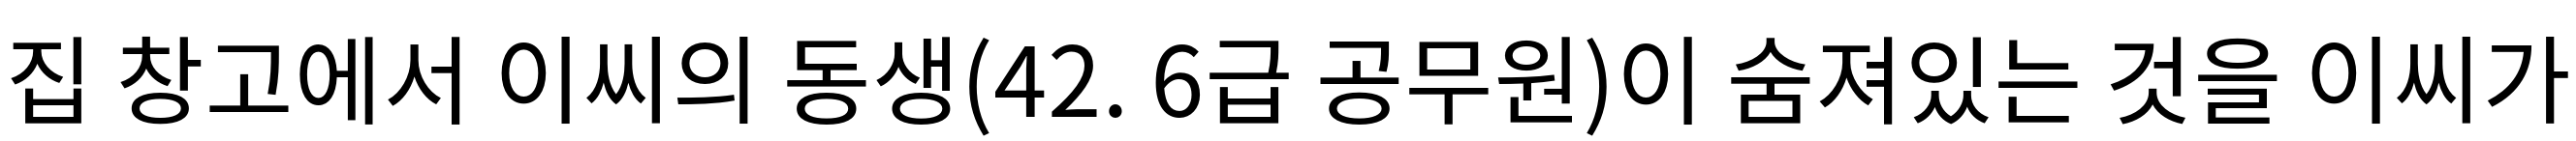

In [50]:
img_idx = np.random.randint(len(train_df))
encoding = train_dataset[img_idx]
for k,v in encoding.items():
    print(k, v.shape)
    
image = Image.open(train_dataset.dataset_dir + train_df['img_path'][img_idx]).convert("RGB")
image    

In [51]:
labels = encoding['labels']
labels[labels == -100] = tokenizer.pad_token_id
label_str = tokenizer.decode(labels, skip_special_tokens=True)
print(label_str)

집 창고에서 이씨의 동생 ( 42. 6급 공무원 ) 이 숨져있는 것을 이씨가


In [52]:
# set special tokens used for creating the decoder_input_ids from the labels
model.config.decoder_start_token_id = tokenizer.cls_token_id
model.config.pad_token_id = tokenizer.pad_token_id
model.config.vocab_size = model.config.decoder.vocab_size

# set beam search parameters
model.config.eos_token_id = tokenizer.sep_token_id
model.config.max_length = max_length
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4

In [ ]:
# !pip uninstall -y transformers accelerate
# !pip install transformers accelerate

In [53]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    evaluation_strategy="steps",
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    num_train_epochs=1,
    fp16=True,
    learning_rate=4e-5,
    output_dir="./models",
    save_steps=5000,
    eval_steps=5000,
)


In [ ]:
# pip install evaluate

In [56]:
import evaluate
cer_metric = evaluate.load("cer")
wer_metric = evaluate.load("wer")

In [57]:
def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    pred_str = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = processor.tokenizer.pad_token_id
    label_str = tokenizer.batch_decode(labels_ids, skip_special_tokens=True)
    
    pred_str = [pred_str[i] for i in range(len(pred_str)) if len(label_str[i]) > 0]
    label_str = [label_str[i] for i in range(len(label_str)) if len(label_str[i]) > 0]

    cer = cer_metric.compute(predictions=pred_str, references=label_str)
    wer = wer_metric.compute(predictions=pred_str, references=label_str)

    return {"cer": cer, "wer": wer}

In [58]:
from transformers import default_data_collator

# instantiate trainer
trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=tokenizer,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=default_data_collator,
)

In [59]:
import gc
gc.collect()

355

In [60]:
result = trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss


  0%|          | 0/564 [00:00<?, ?it/s]

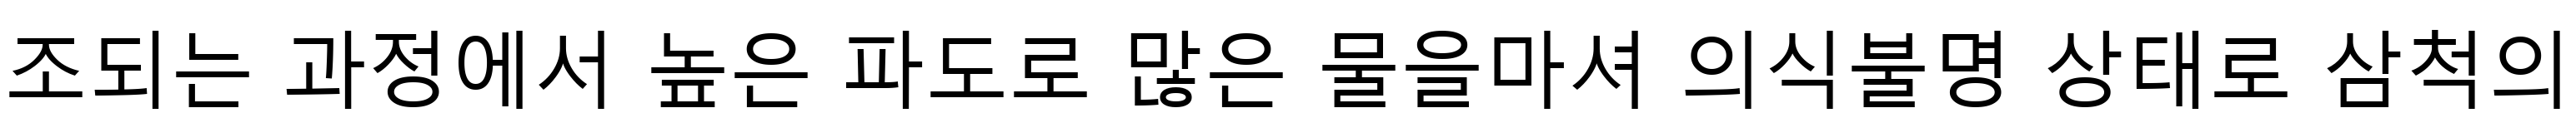

조되는 과정에서 높은 파도로 많은 물을마셔 의식명 상태로 삼척의


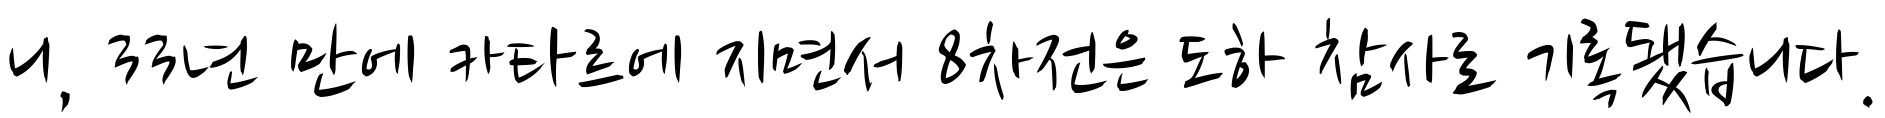

내, 35년 만에 카타르에 자원서 8차전은 도하 감사로 기록됐습니다.


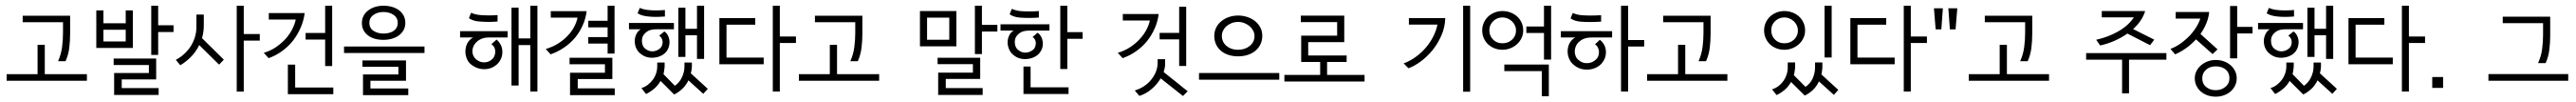

고발사건을 해결했다고 말한 것으로 기억하고 있다 " 고 주장했다. 그


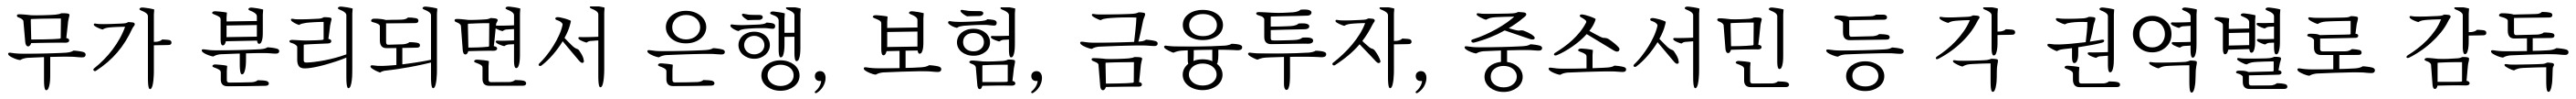

무가 분리되면서 은행, 보험, 금융투자, 중소서민 등 각 권역별로 감독


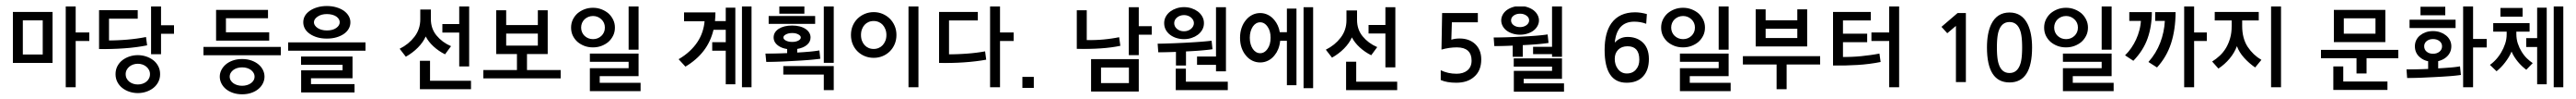

야당 등을 선보일 계획이다. 위원에선 5월 6일부터 10일까지 문화재


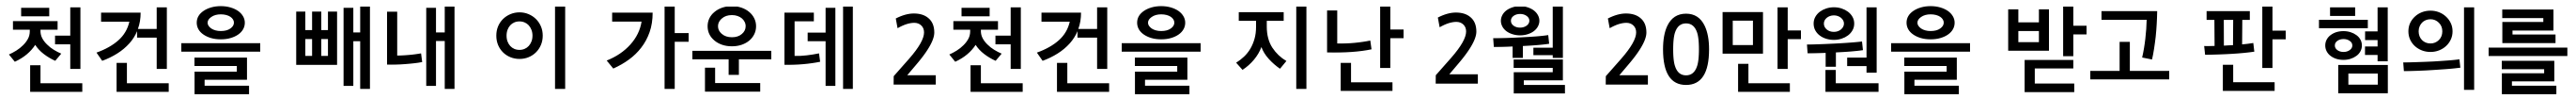

천건을 빼내 이 가운데 2천건을 지난 2월 20만원을 받고 판 혐의를


In [88]:
import cv2
from google.colab.patches import cv2_imshow

from tqdm.auto import tqdm
img_names, outputs, predictions_ids= [], [], []
device=torch.device('cuda')
model.to(device)
for i in tqdm(range(len(test_df))):
    image = Image.open(train_dataset.dataset_dir + test_df['img_path'][i]).convert('RGB')
    pixel_values =(processor(image,return_tensors='pt').pixel_values).to(device)
    generated_ids = model.generate(pixel_values)
    generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
    img_names.append(test_df.img_path[i])
    outputs.append(generated_text) 
    predictions_ids.append(generated_ids)

    if i % 100 == 0:
      image.show()
      print(generated_text)

#img_idx = np.random.randint(len(eval_dataaset))
#image = Image.open(eval_dataset.dataset_dir + train_df['file_name'][img_idx])

In [89]:
for_metric = pd.DataFrame({'image_names':img_names, 'outputs':outputs})

In [91]:
for_metric['label']=test_df['label']
for_metric[['outputs', 'label']]

,outputs,label
0,조되는 과정에서 높은 파도로 많은 물을마셔 의식명 상태로 삼척의,조되는 과정에서 높은 파도로 많은 물을마셔 의식불명 상태로 삼척의
1,"은 "" 이 두가지 과제를 풀고 한류 나머지 추가로 필요한 과제가 있으면","은 ""이 두가지 과제를 풀고 난후 나머지 추가로 필요한 과제가 있으면"
2,당하는 시공사 관계자도 붕괴위험을 사전에 지적하며 보강공사를 수,당하는 시공사 관계자도 붕괴위험을 사전에 지적하며 보강공사를 수
3,크 서비스를 규제하는 방안을 검토하겠다고 밝혔다. 데일리뮤직 길이,크 서비스를 규제하는 방안을 검토하겠다고 밝혔다. 데일리뮤직 길인
4,"경영실적보고서를 평가편람 내용과 다르게 작성하지 말라 "" 고 주의률","경영실적보고서를 평가편람 내용과 다르게 작성하지 말라""고 주의를"
...,...,...
559,"고 큰 사회 문제를 일으키는 원인이 될 것 "" 이라며 "" 결국 그들이 당","고 더 큰 사회 문제를 일으키는 원인이 될 것""이라며 ""결국 그들이 당"
560,"제 상황처럼 해볼 수 있게 돼 돼정비 전문인력 양성은 물론, 새로운 정비","제 상황처럼 해볼 수 있게 돼정비 전문인력 양성은 물론, 새로운 정비"
561,"로 알려졌다. 법무부 관계자는 "" C C검사가 제출한 사표는 대검을 통해","로 알려졌다. 법무부 관계자는 ""C검사가 제출한 사표는 대검을 통해"
562,인 정황이 드러나면서 검찰 수사가 사정기관의 최고위층으로 확대되,인 정황이 드러나면서 검찰 수사가 사정기관의 최고위층으로 확대되
